In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, matplotlib_fname

import seaborn as sns

In [2]:
# jupyter notebookm 내 그래프 바로그리기
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# 한국어 font 설정

## 우분투 한글설치
# $apt-get install -y fonts-nanum fonts-nanum-coding fonts-nanum-extra 

## 설치된 폰트경로 확인
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print(font_list)

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 위 출력된 font_list에서 하나 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()

## 폰트설정
rc('font', family=font_name)
print(plt.rcParams['font.family'])

## 안될경우 해당경로 캐시 제거 및 conda 재시작
# https://financedata.github.io/posts/matplotlib-hangul-for-ubuntu-linux.html
matplotlib_fname()
print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

['/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf', '/usr/share/fonts/truetype/noto/NotoMono-Regular.ttf', '/usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf', '/usr/share/fonts/truetype/nanum/Na

In [55]:
csv_path = '/mnt/d/data_ai/challenge/breast_cancer_metastasis/assets/open/train.csv'
anno_df = pd.read_csv(csv_path, encoding='cp949')

anno_df['수술연월일'] = pd.to_datetime(anno_df['수술연월일'], format='%Y-%m-%d')

anno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 1000 non-null   object        
 1   img_path           1000 non-null   object        
 2   mask_path          1000 non-null   object        
 3   나이                 1000 non-null   int64         
 4   수술연월일              1000 non-null   datetime64[ns]
 5   진단명                1000 non-null   int64         
 6   암의 위치              1000 non-null   int64         
 7   암의 개수              1000 non-null   int64         
 8   암의 장경              931 non-null    float64       
 9   NG                 949 non-null    float64       
 10  HG                 914 non-null    float64       
 11  HG_score_1         908 non-null    float64       
 12  HG_score_2         908 non-null    float64       
 13  HG_score_3         911 non-null    float64       
 14  DCIS_or_L

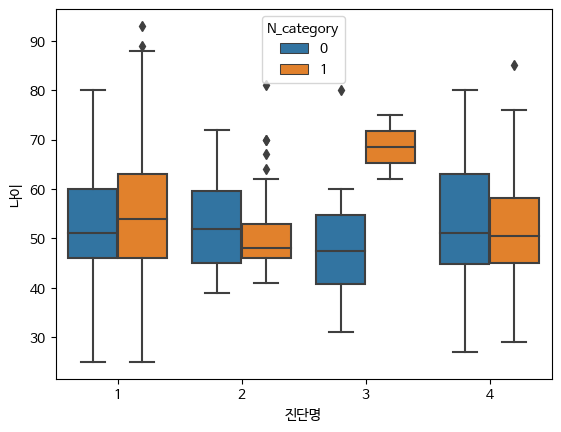

In [52]:
sns.boxplot(y='나이', x='진단명', hue='N_category', data=anno_df)
plt.show()

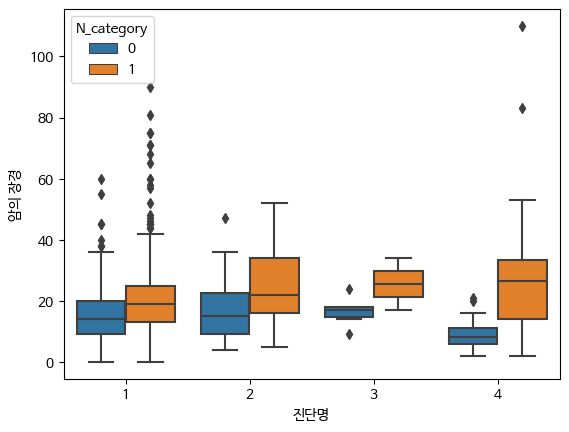

In [23]:
sns.boxplot(y='암의 장경', x='진단명', hue='N_category', data=anno_df)
plt.show()

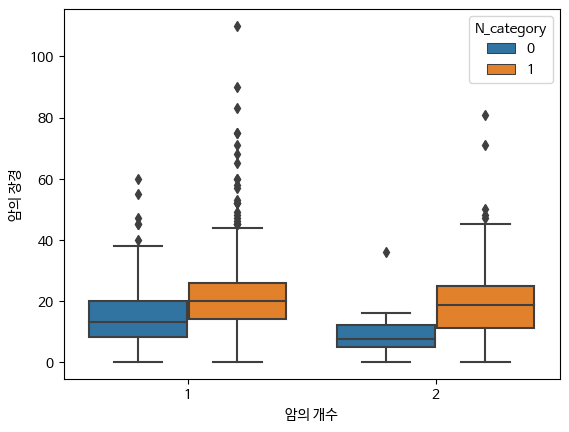

In [58]:
sns.boxplot(y='암의 장경', x='암의 개수', hue='N_category', data=anno_df)
plt.show()

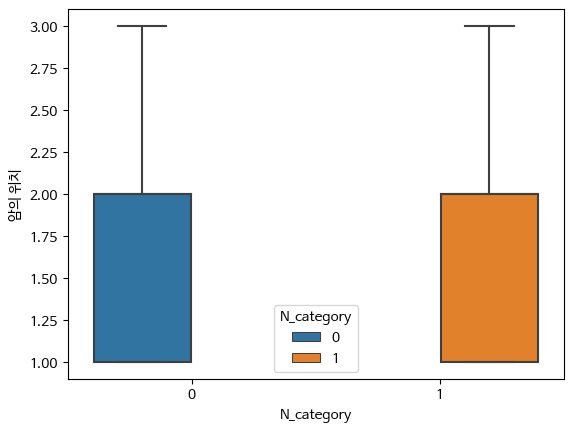

In [61]:
sns.boxplot(y='암의 위치', x='N_category', hue='N_category', data=anno_df)
plt.show()

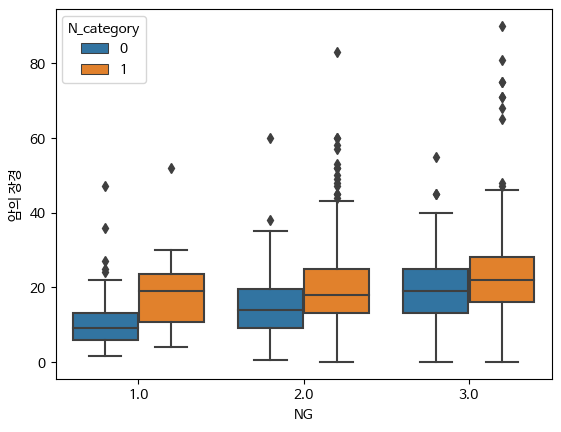

In [63]:
sns.boxplot(y='암의 장경', x='NG', hue='N_category', data=anno_df)
plt.show()

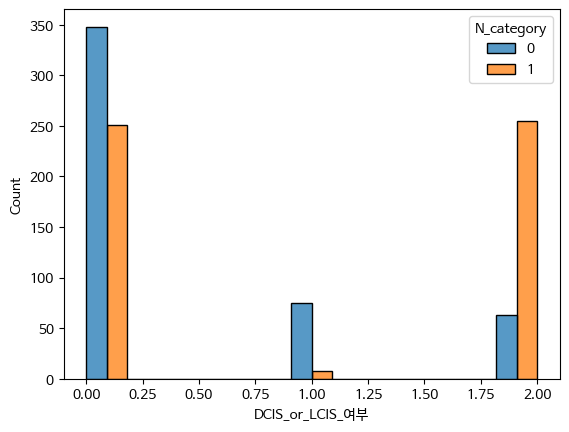

In [82]:
sns.histplot(x='DCIS_or_LCIS_여부', hue='N_category', data=anno_df, multiple='dodge')
# sns.swarmplot(y="DCIS_or_LCIS_type", x="DCIS_or_LCIS_여부", data=anno_df, color=".25")
plt.show()

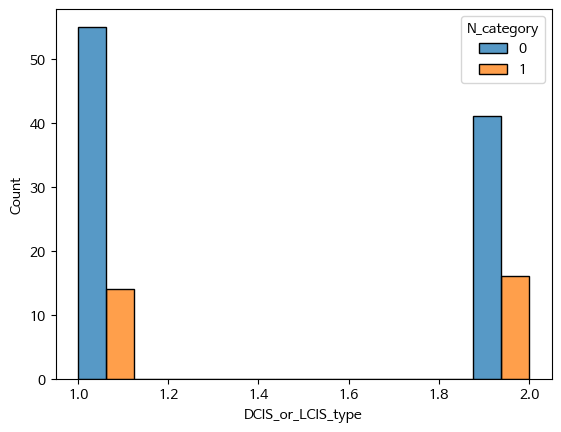

In [78]:
sns.histplot(x='DCIS_or_LCIS_type', hue='N_category', data=anno_df, multiple='dodge')

In [91]:
anno_df[(anno_df['DCIS_or_LCIS_여부'] == 0) & (anno_df['DCIS_or_LCIS_type'] == 2)]
# 제자리 암종이 없는데, 괴사가 일어났다? => 존재한다는게 논리적으로 말이 되지않음
# 확인해보니 DCIS_or_LCIS_type 의 경우 126개만 존재, 

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
125,BC_01_0607,./train_imgs/BC_01_0607.png,-,66,2018-08-10,1,2,1,0.7,2.0,...,NaN,0.0,NaN,8.66,NaN,2.0,NaN,NaN,NaN,1
489,BC_01_2288,./train_imgs/BC_01_2288.png,-,45,2014-12-19,1,1,1,0.9,2.0,...,NaN,0.0,NaN,10.00,1.0,3.0,NaN,NaN,NaN,1
759,BC_01_2858,./train_imgs/BC_01_2858.png,-,47,2008-11-12,1,2,1,18.0,2.0,...,5.0,1.0,3.0,NaN,1.0,2.0,NaN,NaN,NaN,0
766,BC_01_2867,./train_imgs/BC_01_2867.png,-,52,2008-10-07,1,2,1,20.0,2.0,...,8.0,1.0,7.0,10.00,0.0,0.0,NaN,NaN,NaN,0
970,BC_01_3255,./train_imgs/BC_01_3255.png,-,61,2010-04-02,1,2,1,17.0,2.0,...,5.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1
971,BC_01_3262,./train_imgs/BC_01_3262.png,-,40,2010-03-08,1,2,1,18.0,3.0,...,5.0,1.0,5.0,NaN,0.0,0.0,NaN,NaN,NaN,1
974,BC_01_3272,./train_imgs/BC_01_3272.png,-,49,2010-01-26,1,2,1,25.0,2.0,...,5.0,1.0,5.0,NaN,0.0,1.0,NaN,NaN,NaN,1


In [ ]:
# XGBOOST
# https://nobsai.tistory.com/53
# https://blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431714122